## Preprocessing

In [168]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [169]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

In [170]:
# Determine the number of unique values in each column.
unique_counts = application_df.nunique()
unique_counts

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [171]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
threshold = 10
value_counts = application_df['APPLICATION_TYPE'].value_counts()
application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].apply(lambda x: x if value_counts[x] >= threshold else  'Other')

In [172]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

threshold = 10
application_types_to_replace = value_counts[value_counts < threshold].index.tolist()
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
T12         27
T2          16
Other       11
Name: count, dtype: int64

In [173]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
# Step 4: Replace in dataframe
threshold = 10
classification_types_to_replace = value_counts[value_counts < threshold].index.tolist()

for cls in classification_types_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls, "Other")

# Check to make sure replacement was successful
print(application_df['CLASSIFICATION'].value_counts())

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [174]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_types_to_replace = value_counts[value_counts > 1].index.tolist()

for cls in classification_types_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls, "Other")

# Check to make sure replacement was successful
print(application_df['CLASSIFICATION'].value_counts())


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [175]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classifications_to_replace = value_counts[value_counts < threshold].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [176]:
?pd.get_dummies

Signature:
pd.get_dummies(
    data,
    prefix=None,
    prefix_sep: 'str | Iterable[str] | dict[str, str]' = '_',
    dummy_na: 'bool' = False,
    columns=None,
    sparse: 'bool' = False,
    drop_first: 'bool' = False,
    dtype: 'NpDtype | None' = None,
) -> 'DataFrame'
Docstring:
Convert categorical variable into dummy/indicator variables.

Each variable is converted in as many 0/1 variables as there are different
values. Columns in the output are each named after a value; if the input is
a DataFrame, the name of the original variable is prepended to the value.

Parameters
----------
data : array-like, Series, or DataFrame
    Data of which to get dummy indicators.
prefix : str, list of str, or dict of str, default None
    String to append DataFrame column names.
    Pass a list with length equal to the number of columns
    when calling get_dummies on a DataFrame. Alternatively, `prefix`
    can be a dictionary mapping column names to prefixes.
prefix_sep : str, default '_'
  

In [177]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df, columns=['CLASSIFICATION',],drop_first=True)
application_df



,APPLICATION_TYPE,AFFILIATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,CLASSIFICATION_C1000,...,CLASSIFICATION_C6000,CLASSIFICATION_C6100,CLASSIFICATION_C7000,CLASSIFICATION_C7100,CLASSIFICATION_C7120,CLASSIFICATION_C7200,CLASSIFICATION_C7210,CLASSIFICATION_C8000,CLASSIFICATION_C8200,CLASSIFICATION_C8210
0,T10,Independent,ProductDev,Association,1,0,N,5000,1,True,...,False,False,False,False,False,False,False,False,False,False
1,T3,Independent,Preservation,Co-operative,1,1-9999,N,108590,1,False,...,False,False,False,False,False,False,False,False,False,False
2,T5,CompanySponsored,ProductDev,Association,1,0,N,5000,0,False,...,False,False,False,False,False,False,False,False,False,False
3,T3,CompanySponsored,Preservation,Trust,1,10000-24999,N,6692,1,False,...,False,False,False,False,False,False,False,False,False,False
4,T3,Independent,Heathcare,Trust,1,100000-499999,N,142590,1,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,ProductDev,Association,1,0,N,5000,0,True,...,False,False,False,False,False,False,False,False,False,False
34295,T4,CompanySponsored,ProductDev,Association,1,0,N,5000,0,False,...,False,False,False,False,False,False,False,False,False,False
34296,T3,CompanySponsored,Preservation,Association,1,0,N,5000,0,False,...,False,False,False,False,False,False,False,False,False,False
34297,T5,Independent,ProductDev,Association,1,0,N,5000,1,False,...,False,False,False,False,False,False,False,False,False,False


In [178]:
?application_

Object `application_` not found.


In [185]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['ORGANIZATION','APPLICATION_TYPE','AFFILIATION','USE_CASE', 'IS_SUCCESSFUL','INCOME_AMT','SPECIAL_CONSIDERATIONS'], axis=1).to_numpy()
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [186]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [188]:
X_train[0]

array([1, 5000, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False],
      dtype=object)

In [187]:

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 635 (2.48 KB)

 Trainable params: 635 (2.48 KB)

 Non-trainable params: 0 (0.00 B)

In [190]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [191]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.5570 - loss: 0.7054
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5715 - loss: 0.6770
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5768 - loss: 0.6716
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.5822 - loss: 0.6708
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.5785 - loss: 0.6698
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.5775 - loss: 0.6702
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5709 - loss: 0.6707
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5691 - loss: 0.6727
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5800 - loss: 0.6638
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5791 - loss: 0.6627
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5763 - loss: 0.6658
Epoch 12/100
804/804 ━━━━━━━━━━━━

In [192]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 3ms/step - accuracy: 0.5823 - loss: 0.6685
Loss: 0.6684721112251282, Accuracy: 0.5822740793228149


In [193]:
# Export our model to HDF5 file
nn.save

<bound method Model.save of <Sequential name=sequential, built=True>>

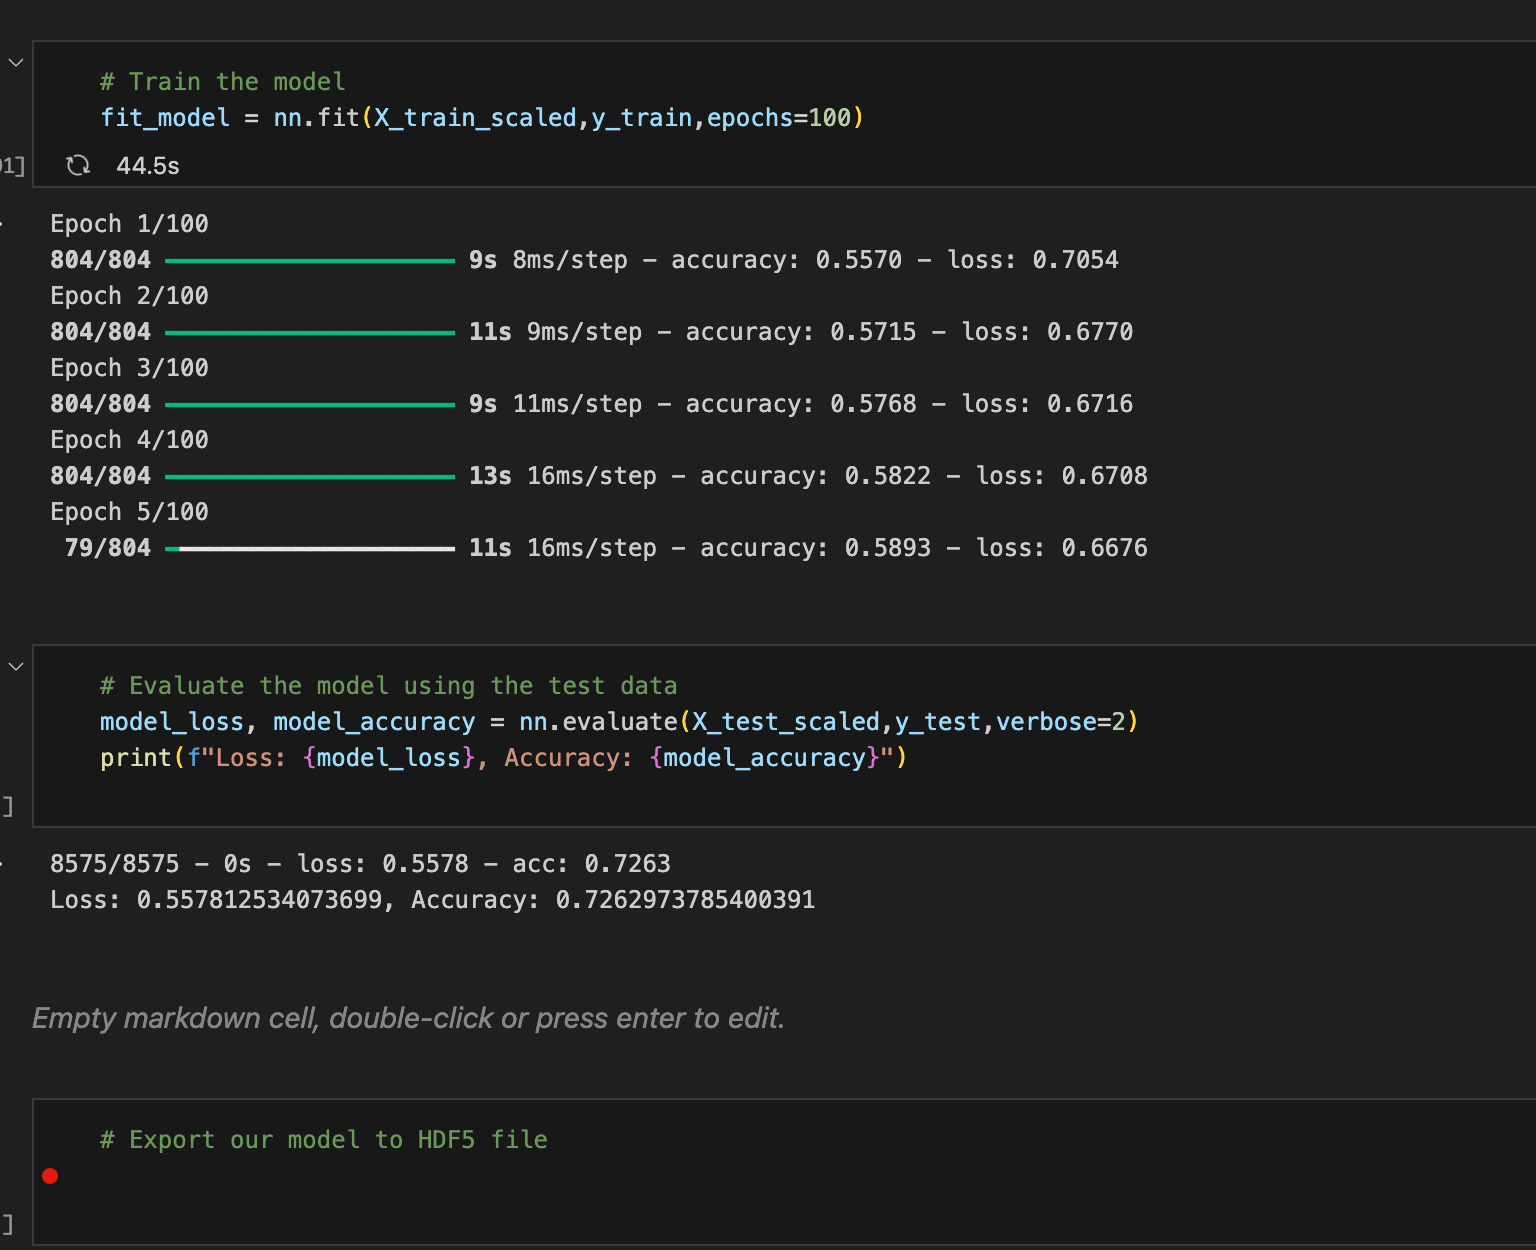